# <center> Effects of time and demographic factors on the use of the Ford Gobike bike share service.
 ## <center> by Sheila Alwanga Olayo


## Investigation Overview

>For the presentation, I focus on time and demographic information and how they affect the numbers of bike rides. First, I introduce each of the features independently, showing their distributions and frequencies starting with **ride duration**, **period of day**, **day of the week**, **gender** then **age** in that order.

>Afterwards, I show how combinations of these features affect the numbers of bike rides with respect to each other. By first  plotting **ride duration** against **period of day**, **day of the week** then **gender**. Then plotting **period of day** against **day**.


## Dataset Overview

>The dataset includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay area, for the month of February, 2019.

>My dataset initially had 183,412 records and 16 columns. However after some wrangling which involved dropping records with null or inaccurate values and some feature engineering, the dataset now has 174,877 records and 21 columns. The five additional columns include **'date', 'day', 'day_period'** derived from the **'start_time'** column, **'age'** derived from **'member_birth_year'** column and **'duration_min'** derived from the **'duration_sec'** column.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
#changing data types of 'start_time' and 'end_time' columns
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [4]:
#dropping all rows with null values
bike.dropna(inplace = True)

In [5]:
#changing data type of 'member_birth_year' column
bike.member_birth_year = bike.member_birth_year.astype(int)

In [6]:
#extracting 'day' and 'date' from 'start_time' column
bike['date'] = bike['start_time'].dt.date
bike['day'] = bike['start_time'].dt.day_name()

In [7]:
#converting 'day' to an ordered categorical datatype
day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
wk_day = pd.api.types.CategoricalDtype(ordered = True, categories = day)
bike.day = bike.day.astype(wk_day)

In [8]:
#creating an 'age' column
bike['age'] = 2019 - bike.member_birth_year 

In [9]:
#filtering out rows with age 99 and over
bike = bike.loc[bike.age < 93].copy()

In [10]:
#creating a duration in minutes column
bike['duration_min'] = bike.duration_sec/60

In [11]:
#creating a dictionary of time periods
time_periods = [{'period':'morning','start':'5:59:01','end':'11:59:00'},
{'period':'afternoon','start':'11:59:01','end':'15:59:00'},
{'period':'evening','start':'15:59:01','end':'23:59:00'},
{'period':'late_night','start':'23:59:01','end':'5:59:00'}]

In [12]:
#creating a function to create new dataframes according to daytime periods
def day_period(start_time,end_time):
    '''creates new dataframes according to day time periods'''
    period_df = bike.between_time(start_time,end_time)
    return period_df.copy()

In [13]:
#setting 'bike' df's start_time as index, so as to be able to use the between_time() function on it
bike = bike.set_index('start_time')

In [14]:
#creating time _period data frames
i = 0
while i < 4:
    morning = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    afternoon = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    evening = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    late_night = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1


In [15]:
#creating a function to add a day_period column to the dataframes
def add_column(df,value):
    df['day_period'] = value

In [16]:
#adding day_period column to the dataframes
day_period = [(morning,'morning'),(afternoon,'afternoon'),(evening,'evening'),(late_night,'late_night')]
for period in day_period:
    add_column(period[0],period[1])

In [17]:
#merging the four datasets to replace original 'bike' dataset
bike = morning.append([afternoon,evening,late_night],ignore_index  = False)

In [18]:
#resetting bike df's index
bike = bike.reset_index()

In [19]:
#creating a fuction that plots seaborn countplots
def Countplot(df, xvar, huevar=None, color=0, palette=None, order=None):
    #set plot dimentions
    plt.figure(figsize = [14,6])
    #plot
    sb.countplot(data=df, x=xvar, hue=huevar, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    #clean up variable names
    xvar = xvar.replace("_"," ")
    if huevar:
        huevar = huevar.replace("_"," ")
    #add title and format it
    plt.title(f"Distribution of bike rides: {xvar} {'by' if huevar else ''} {huevar if huevar else ''}" .title(), fontsize=14, weight='bold')
    #add x label and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    #add y label and format it
    plt.ylabel('Frequency', fontsize=10, weight='bold')

### Distribution of the length of bike rides
Due to the wide range of values for the length of bike rides, this plot focuses on the 0-80 minute range, where the larger majority of data is concentrated. The distribution is right skewed, with a steep rise in the 5-10 minute range where majority of the values lie, and an equally steep decline in the 10-15 minute range as frequencies go on decreasing.
Majority of rides are therefore 5-10 minutes long.

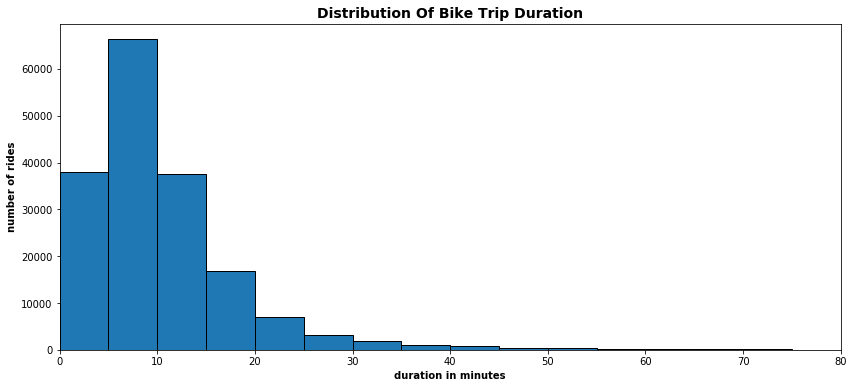

In [20]:
#plotting a histogram of 'duration_min' focusing on the 0-80 minute range
plt.figure(figsize = [14,6])
bins = np.arange(0,80,5)
plt.hist(bike.duration_min, bins = bins, edgecolor = 'black')
plt.xlim(0,80)
plt.title('Distribution of bike trip duration'.title(),fontsize=14, weight='bold')
plt.xlabel('duration in minutes',fontsize=10, weight='bold')
plt.ylabel('number of rides',fontsize=10, weight='bold');

### Frequency of rides as per period of the day

The period of the day with the highest number of bike rides is the evening, that is between 4 pm and 11 pm. Followed closely by the morning period, 6am - 11:59 am. The late night period 12am - 5:59pm however has a very low frequency of bike rides.

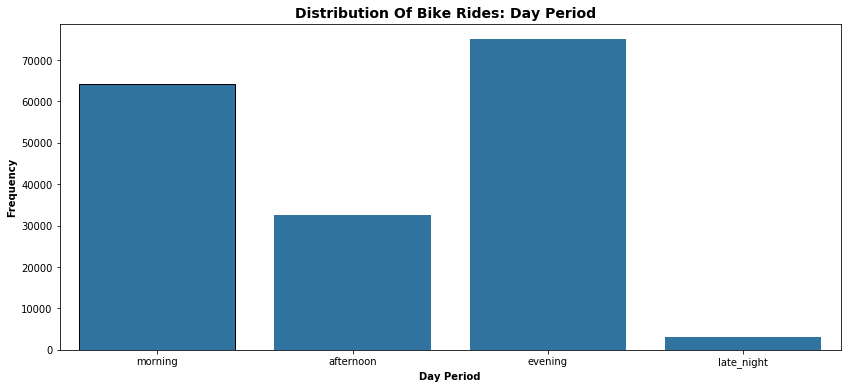

In [21]:
#plotting a bargraph for the 'day_period' variable
Countplot(bike,'day_period')

### Frequency of rides as pertaining to the day of the week
The plot shows that Thursdays tend to have the most number of rides,closely followed by Tuesdays, while Saturdays and Sundays register the least number rides.


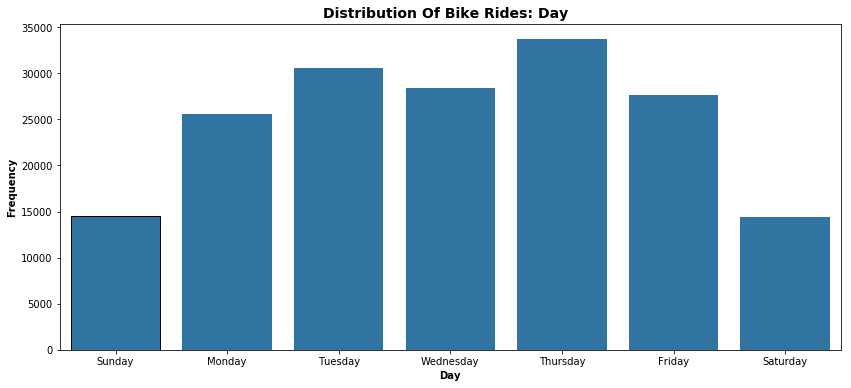

In [22]:
#plotting a bargraph for the 'day' column
Countplot(bike,'day')

### Distribution of the frequency of rides according to gender
A majority of rides are taken by male members, with the number of rides by female members equating to approximately a third of that of male members.

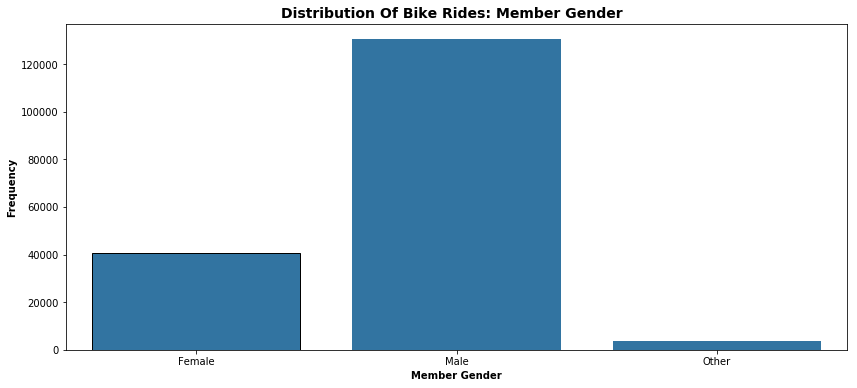

In [23]:
#plotting a bargraph for the 'member_gender' column
Countplot(bike,'member_gender')

### Distribution of frequency of  rides for different age groups
This is a slightly right skewed distribution with a majority number of the rides lying in the mid 20's to early 30's age group. There's a sharp drop in the number of rides at the age 40 mark and this drop continuously tapers off, declining as the ages increase up until the 90's.

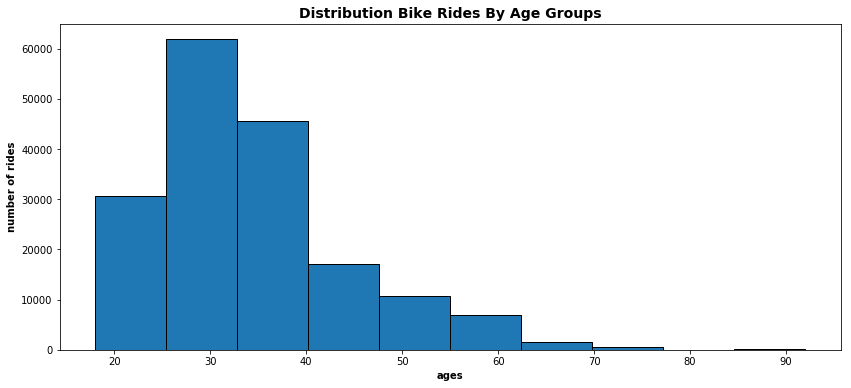

In [24]:
#plotting a histogram for the 'age' column
plt.figure(figsize = [14,6])
plt.hist(bike.age,edgecolor = 'black')
plt.xlabel('ages', fontsize=10, weight = 'bold')
plt.ylabel('number of rides', fontsize=10, weight='bold')
plt.title('Distribution bike rides by age groups'.title(),fontsize=14, weight='bold');

### Ride duration by period of the day

The distribution of the ride duration values throughout all the periods of the day, except the late night still shows the 5-10 minute rides being a majority. Minor differences are however seen for other time ranges. In the mornings, there are more 10-15 minute rides as opposed to 0-5 minute rides. The opposite is however true for the afternoon and evening. The late night period is an exception to all this because it appears to have an equal number of rides that are in the 0-5 and 5-10 minute ranges, these being the majority.

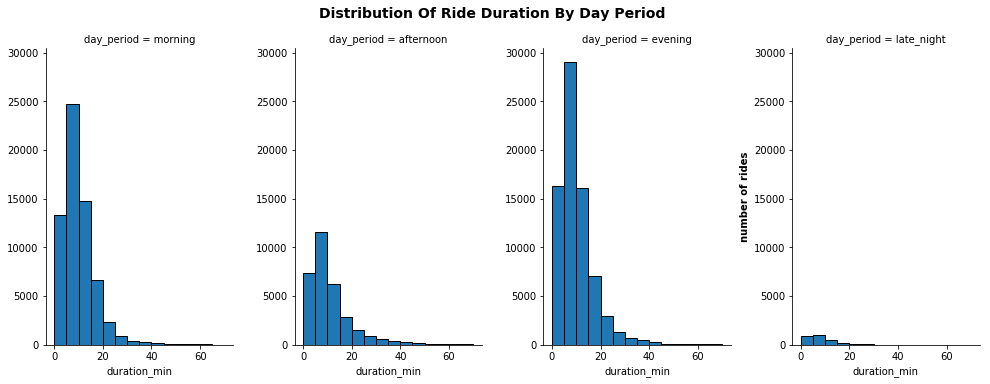

In [25]:
# plotting a Facet grid
bins = np.arange(0,75,5)
g = sb.FacetGrid
g = sb.FacetGrid(data=bike, col = 'day_period')
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,6)
plt.ylabel('number of rides',fontsize=10, weight='bold');
plt.suptitle('Distribution of ride duration by day period'.title(),fontsize=14, weight='bold');

### Ride duration by day of the week

The distribution of the ride duration values against days of the week also still shows that 5-10 minute bike rides were the majority across all the days of the week. The variations here also appear in the differences betweeen 0-5 minute and 10-15 minute ranges. On Sundays,Mondays and Saturdays, the number of 0-5 minute bike rides are slightly higher, while on Tuesdays and Thursdays the 10-15 minute bike rides are slightly more. Note that Tuesdays and Thursdays overall have the highest number of bike rides throughout the week. Perhaps they are the busier days, hence why people are taking longer bike rides to supplement regular transport means.

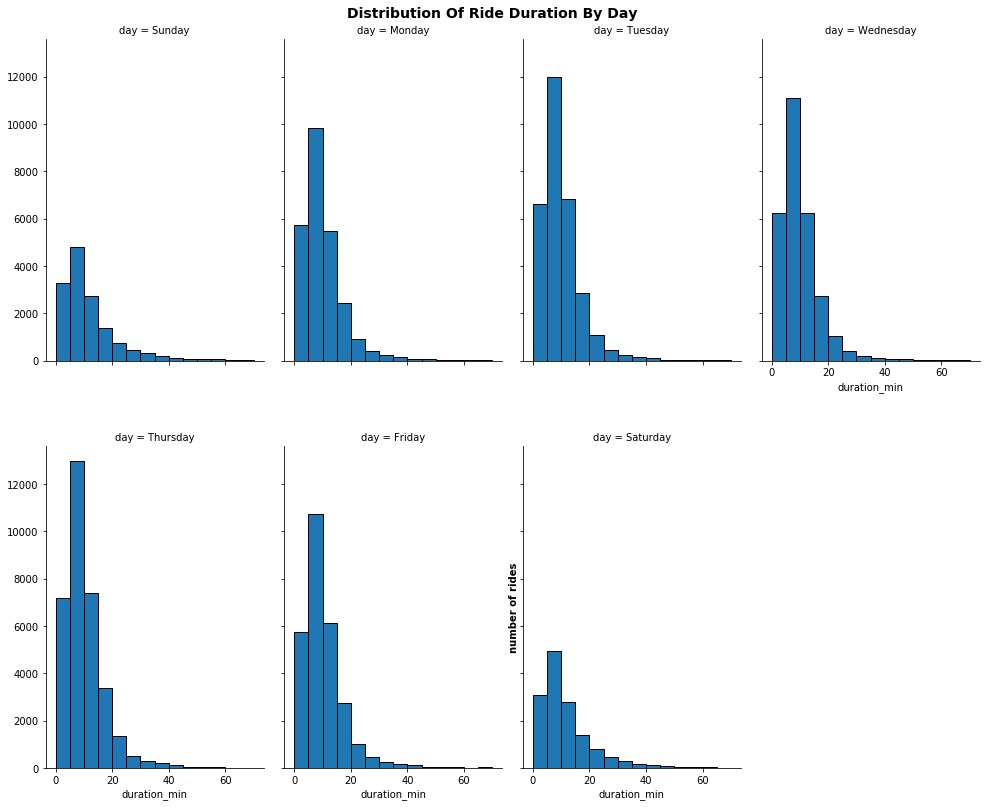

In [26]:
#plotting a FacetGrid
bins = np.arange(0,75,5)
g = sb.FacetGrid(data=bike, col = 'day', col_wrap = 4)
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,12)
plt.ylabel('number of rides',fontsize=10, weight='bold');
plt.suptitle('Distribution of ride duration by day'.title(), fontsize=14, weight='bold');

### Ride duration by gender

The 5-10 minute ride duration still  has the highest frequency across all genders. However, there are more 10-15 minute rides relative to 0-5 minute rides by female members while the opposite is true for male members.

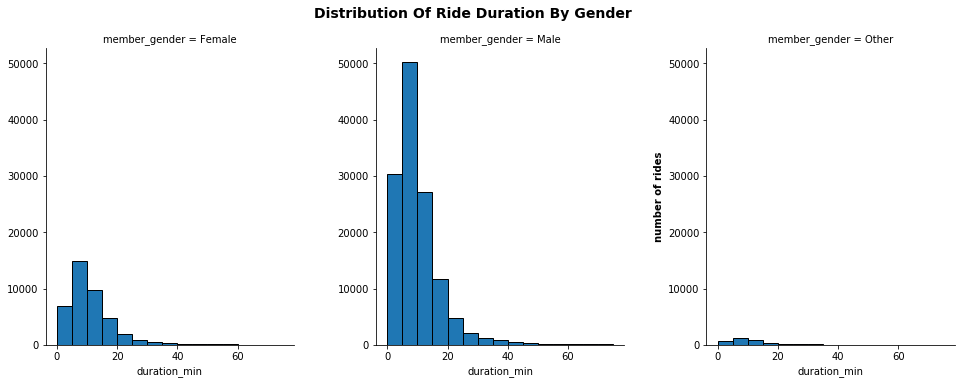

In [27]:
#plotting a FacetGrid
bins = np.arange(0,80,5)
g = sb.FacetGrid
g = sb.FacetGrid(data=bike, col = 'member_gender')
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,6)
plt.ylabel('number of rides',fontsize=10, weight='bold');
plt.suptitle('Distribution of ride duration by gender'.title(), fontsize=14, weight='bold');

### Bike rides by day and day periods

On the week-days, mornings and evenings are seen to have the higher numbers of bike rides. While on the weekends, afternoons and evenings have the higher numbers with each of their counts being nearly equal. Although evenings have been seen to have the highest number of bike rides generally, Friday evenings have a lower number of rides compared to Friday mornings.


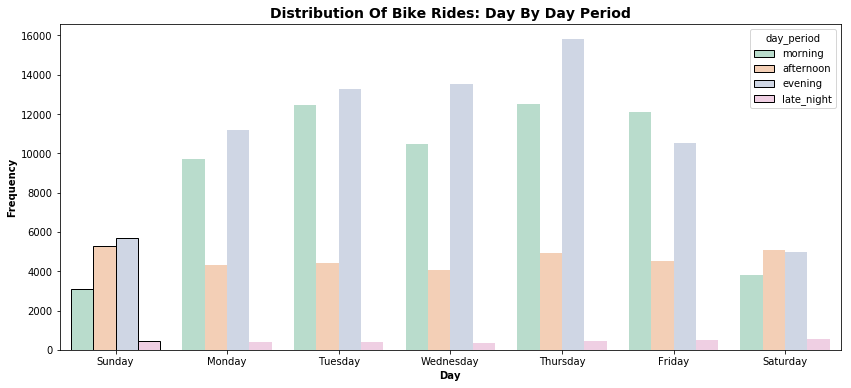

In [28]:
#clustered bar chart
Countplot(bike, 'day', huevar='day_period', palette='Pastel2')

### Summary
> The features of interest were observed to be largely independent with only slight variations when plotted against each other and in other instances, no variations at all.
They each affect the number of bike rides to varying degrees, with some such as gender, age, ride duration, period of the day having a stronger effect than others like what day of the week it is. 


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
#Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 